# Capstone project task 3

## Task 3.1:
There are some labels are locations, sauces that are commonly mentioned in reviews about Chinese restaurant. So I remove labels like los angeles or hong kong all.
After remove all thing that I consider not a cuisine. There are remaining roundly 100 chinese label dishes.

## Task 3.2:
In this task I will use Phrases and Word2Vec from gensim libraries to find dishes name.

In [1]:
from gensim.models import *
import pandas as pd
import nltk
import re
import string
from collections import *
from stop_words import safe_get_stop_words
import graphlab as gl
import matplotlib.pyplot as plt 
from wordcloud import WordCloud
stop = gl.text_analytics.stopwords() |set(safe_get_stop_words('en')+list(string.punctuation)+nltk.corpus.stopwords.words('english'))

First, I know it is unlikely that there are a dish name with anything other letters in there name so with all charaters that does not in set [a-z]

In [2]:
reviews = pd.read_csv('categories/Chinese.txt',sep='\n\n',encoding='utf-8',header=None, engine='python').as_matrix().tolist()

In [3]:
sentences = []
for review in reviews:
    out = re.sub('[^a-z]+', ' ', review[0].decode('utf-8').lower())
    sentence = [i for i in nltk.word_tokenize(out) if i not in stop]
    sentences.append(sentence)

### Use Phrases:
After preprocess all review I use Phrases. It is also noticed that because normally chinese dishes name have more than one word in english so I will only consider the phrases that have 2 or more words. Look at top 10 most common phrases We can see that there are many dishes name, however there are also things like chinese food or chinese restaurant appear on the very top that we acctually know what they mean and they are not what we need.

In [4]:
model = Phrases(sentences)

In [5]:
counter = Counter()
for key in model.vocab.keys():
    if len(key.split('_'))>1:
        counter[key.replace('_',' ')] += model.vocab[key]
for word,cnt in counter.most_common(10):
    print word.encode("utf-8")

chinese food
fried rice
chinese restaurant
orange chicken
food good
sweet sour
egg rolls
hot sour
pretty good
panda express


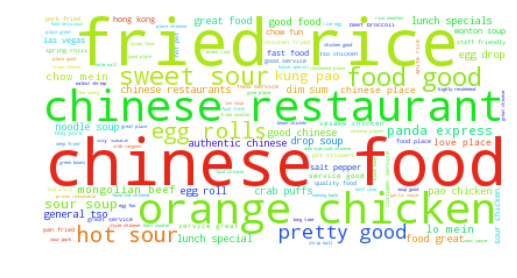

In [6]:
wordcloud = WordCloud(background_color='white').generate_from_frequencies(counter.items())
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Use Word2Vec:
After using phrases I ran word2vec with the data generated in phrases as suggested in [Gensim's document](https://radimrehurek.com/gensim/models/word2vec.html). Look at top 10 label generated. It's clear that there is an improvement as 9/10 of them are dishes name. Look at visualization we can see that words that we don't want like chinese restaurants or chinese food are ranked much lower than previous.

In [7]:
w2v = Word2Vec(model[sentences], size=200,seed = 317)

In [9]:
counter = Counter()
for key in w2v.vocab.keys():
    if len(key.split('_'))>1:
        counter[key.replace('_',' ')] += w2v.vocab[key].count
for word,cnt in counter.most_common(10):
    print word.encode("utf-8")

fried rice
orange chicken
sweet sour
egg rolls
hot sour
panda express
kung pao
mongolian beef
chow mein
lunch specials


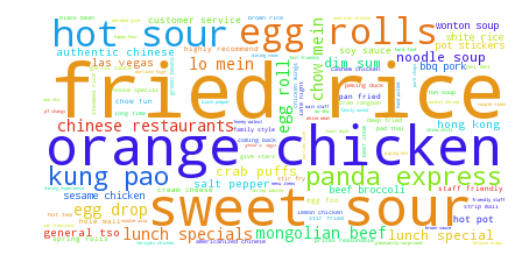

In [10]:
wordcloud = WordCloud(background_color='white').generate_from_frequencies(counter.items())
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Opinion

Even though top labels are dishes. These algorithms still have drawback as panda express are ranked even higher in word2vec comparing with phrases. Furthermore, These algorithms can only find well known dishes that are mentioned in many reviews like fried rice or rolls.

In [11]:
with open('dishes.txt','w') as f:
    f.write("\n".join([word for word,cnt in counter.most_common() if cnt > 10]))